In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

### Algorithm
My genetic algorithm is elitist, in each generation the best half of the population is left intact, instead the worst individuals are replaced. To obtain the new individuals, crossover and mutation operations are carried out. I have built a population of 300 individuals, which I have evolved for 500 generations.

The crossover occurs with a probability of $ 60 \% $ and the selection of individuals to apply it to is such as to favor the choice of individuals with better fitness. To do this, the index identifying the selected individual is extracted according to $ i = \lfloor N u ^ 4 \rfloor + 1 $, where N is the population size and u is a number drawn uniformly in the interval $ [0 , 1) $.
    
Mutations occur with a probability of $ 50 \% $ and are of 5 types:
1. An exchange between two randomly selected genes
2. An exchange between two adjacent genes
3. The shift of a part of the chromosome
4. A permutation between random-sized groups of adjacent cities
5. The reversal of the order of a random number of adjacent cities
    
To calculate the fitness of the chromosomes, that is their path length, I used the $ L ^ {(1)} $ norm.

## Part 1: <span style="color:indigo"> Cities disposed on a circle <span>

In [2]:
# get position of the 32 cities in a square

cities = 32

positions = np.genfromtxt("pos_circle.csv", delimiter=',', dtype=float, skip_header=1)
pos_x = positions[:,0]
pos_y = positions[:,1]


Starting path length =  38.0954 	 Average starting path length =  40.686
Best path length =  6.23496 	 Average best path length =  6.23496 



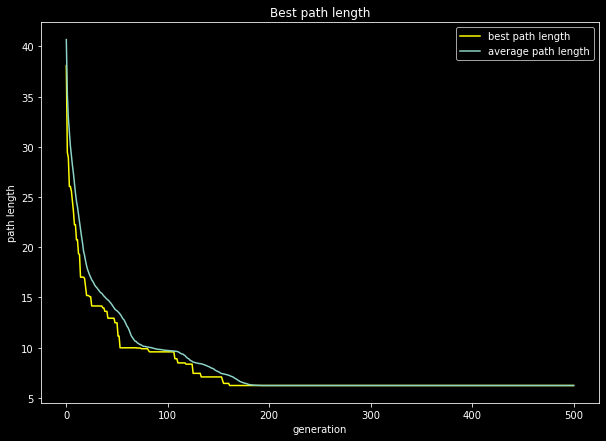

In [7]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

fig, ax = plt.subplots(1, 1, figsize=(10,7))
cost = np.genfromtxt("cost_circle.csv", dtype=float, delimiter=',')
ave_cost = cost[:,1]
cost = cost[:,0]
ax.plot(np.arange(len(cost)), cost, label='best path length',color='yellow')
ax.plot(np.arange(len(ave_cost)), ave_cost, label='average path length')
print("\nStarting path length = ", cost[0], "\t Average starting path length = ", ave_cost[0])
print("Best path length = ", cost[-1], "\t Average best path length = ", ave_cost[-1], '\n')
ax.set_xlabel('generation')
ax.set_ylabel('path length')
ax.set_title('Best path length')
ax.legend()

    The graph shows the cost of the best path as a function of the number of runs performed in yellow, while the average cost of the best half of the population for each generation is shown in light blue. As I expect, chromosome fitness improves dramatically as the number of epochs increases. Furthermore, the average cost is slightly higher than the cost of only the best path for the first 200 generations, after which the two values coincide which indicates that half of the population is made up of paths with excellent fitness, so a number of runs lower than 500 is sufficient to get a good result.


Starting path = [ 1 31 29 24 13  8 27 30 32 19 26  4 28 11  9  7  3 25 21 14 12  2 22  5
 16 23 20 18 10  6 17 15]
Optimal path = [ 1 27 26 11  8 28  4  6 18 31 13 22 29 30 10  9 12 19  7 23  3 15 32  5
 25 24 17 21 20 16 14  2] 



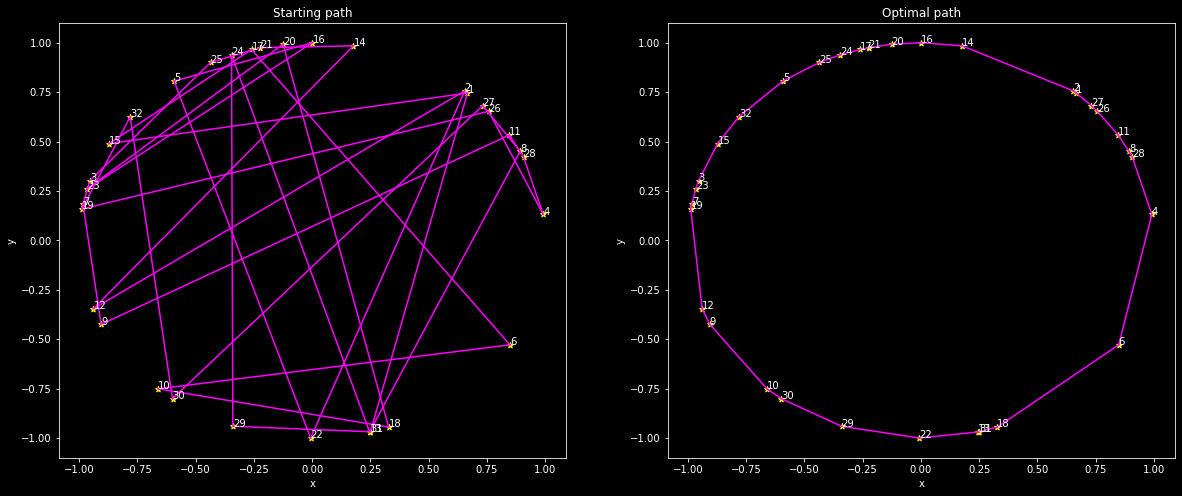

In [10]:
# plot the best path

paths = np.genfromtxt("best_cromo_circle.csv", dtype=int, delimiter=',')

fig, axx = plt.subplots(1, 2, figsize=(20,8))
    
for ind in [0,1]:
    ax = axx[ind]
    ax.scatter(x=pos_x, y=pos_y, color='yellow', marker='*')
    for i in range(cities):
        ax.annotate(str(i+1), positions[i])
    path = paths[ind]
    for i in range(cities):
        x1 = pos_x[path[i-cities*int(i/cities)]-1]
        y1 = pos_y[path[i-cities*int(i/cities)]-1]
        x2 = pos_x[path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[path[i+1-cities*int((i+1)/cities)]-1]
        ax.plot([x1, x2], [y1, y2], color='fuchsia')
    if ind == 0:
        title = 'Starting path'
    else:
        title = 'Optimal path'
    ax.set_title(title)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
print("\nStarting path =", paths[0])
print("Optimal path =", paths[1], '\n')

The graphs compare the initial and the optimized path. The excellent functioning of the code is evident, which is able to effectively identify the shortest path on the circumference.

## Part 2: <span style="color:indigo"> Cities inside a 2x2 square <span>

In [11]:
# get position of the 32 cities in a square

cities = 32

positions = np.genfromtxt("pos_square.csv", delimiter=',', dtype=float, skip_header=1)
pos_x = positions[:,0]
pos_y = positions[:,1]


Starting path length =  36.6341 	 Average starting path length =  32.9758
Best path length =  7.86324 	 Average best path length =  7.86324 



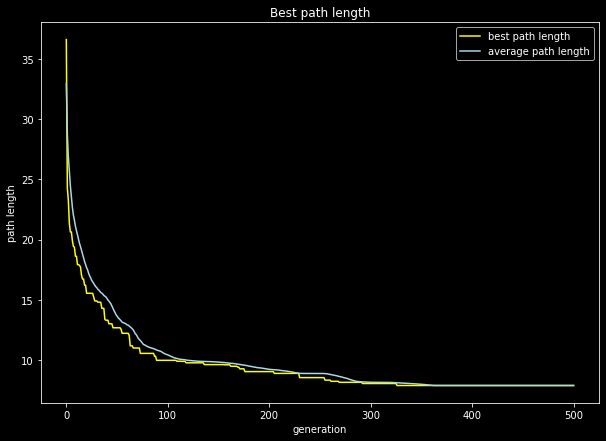

In [16]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

fig, ax = plt.subplots(1, 1, figsize=(10,7))
cost = np.genfromtxt("cost_square.csv", dtype=float, delimiter=',')
ave_cost = cost[:,1]
cost = cost[:,0]
ax.plot(np.arange(len(cost)), cost, label='best path length',color='yellow')
ax.plot(np.arange(len(ave_cost)), ave_cost, label='average path length',color='lightblue')
print("\nStarting path length = ", cost[0], "\t Average starting path length = ", ave_cost[0])
print("Best path length = ", cost[-1], "\t Average best path length = ", ave_cost[-1], '\n')
ax.set_xlabel('generation')
ax.set_ylabel('path length')
ax.set_title('Best path length')
ax.legend()

    The graph shows the cost of the best path as a function of the number of runs performed in yellow, while the average cost of the best half of the population for each generation is shown in light blue. As I expect, chromosome fitness improves dramatically as the number of epochs increases. Furthermore, the average cost is slightly higher than the cost of only the best path for the first 200 generations, after which the two values coincide which indicates that half of the population is made up of paths with excellent fitness, so a number of runs lower than 500 is sufficient to get a good result.


Starting path = [ 1 26  5 32 27 12 31 25 20 11 28 15 10 17  3 16 21 14 24 18 19 29  7  8
  6 22 30 23  2  4 13  9]
Optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17 16  7 25 21 19 26 15  5 27 24 23
  3  9 11 18  6 28 20 32] 



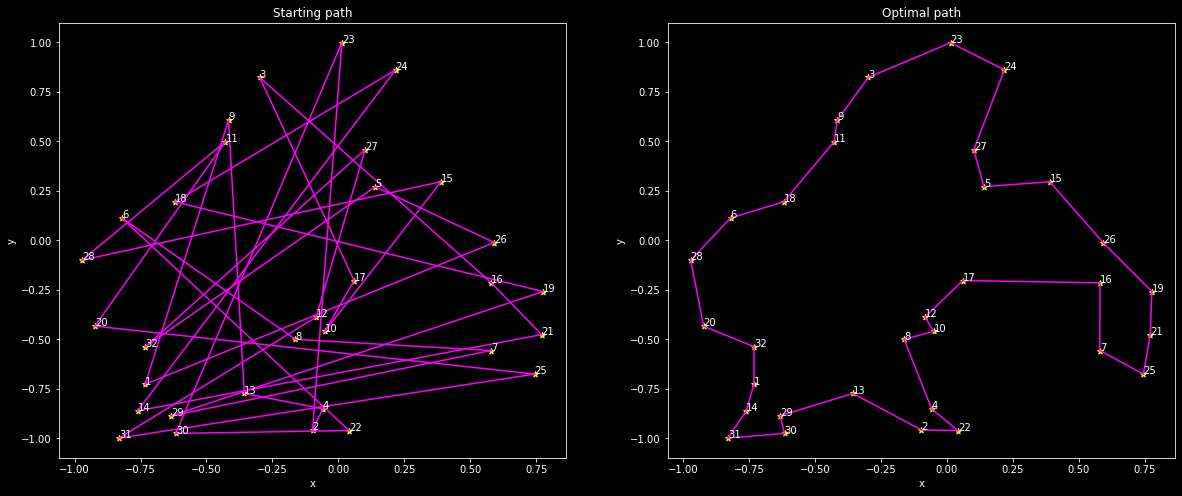

In [18]:
# plot the best path

paths = np.genfromtxt("best_cromo_square.csv", dtype=int, delimiter=',')

fig, axx = plt.subplots(1, 2, figsize=(20,8))
    
for ind in [0,1]:
    ax = axx[ind]
    ax.scatter(x=pos_x, y=pos_y, color='yellow', marker='*')
    for i in range(cities):
        ax.annotate(str(i+1), positions[i])
    path = paths[ind]
    for i in range(cities):
        x1 = pos_x[path[i-cities*int(i/cities)]-1]
        y1 = pos_y[path[i-cities*int(i/cities)]-1]
        x2 = pos_x[path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[path[i+1-cities*int((i+1)/cities)]-1]
        ax.plot([x1, x2], [y1, y2], color='fuchsia')
    if ind == 0:
        title = 'Starting path'
    else:
        title = 'Optimal path'
    ax.set_title(title)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
print("\nStarting path =", paths[0])
print("Optimal path =", paths[1], '\n')

The graphs compare the initial and the optimized path. The excellent functioning of the code is evident, which is able to effectively identify the shortest path on the circumference.